In [5]:
import time
import math
import random
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

from sklearn.metrics import confusion_matrix
from datetime import timedelta

import dataset
import img_manipulation

%matplotlib inline

# Configuration

In [2]:
# paths
orginal_folder = "c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/"
processed_folder = "c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy_transformed/"
checkpoint_dir = "models/"

# Number of color channels for the images: 1 channel for gray-scale.
num_channels = 3

# image dimensions (only squares for now)
img_size = 224

# Size of image when flattened to a single dimension
img_size_flat = img_size * img_size * num_channels

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# class info
classes = dataset.get_classes(orginal_folder)
num_classes = len(classes)

# batch size
batch_size = 32

# validation split
validation_size = .16

# how long to wait after validation loss stops improving before terminating training
early_stopping = None  # use None if you don't want to implement early stoping

print("Classes: {num_classes}".format(num_classes = num_classes))
for key in classes:
    print("{class_name}".format(class_name=key))

Classes: 14
Achaemenid
Ancient
Art deco
Baroque
Byzantine
Chinese
Indo-islamic
Neo
Postmodernism
Renesans
Romanesque
Russian Revival
Secession
Victorian_Quenn Anne


# Image preprocesing
Resize and pad image to 224x224

In [4]:
img_manipulation.resize_and_pad_folder(orginal_folder, processed_folder, (200,200), 127)

Reading images
Processing Achaemenid
Processing Ancient
Processing Art deco
Exception for file:c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/Art deco\658.jpg
Processing Baroque
Processing Byzantine
Processing Chinese
Processing Indo-islamic
Processing Neo
Exception for file:c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/Neo\neo-classical-facade-city-hall-lisbon-portugal-praĂ§a-do-municĂ­pio-allegorical-figures-pediment-31432737.jpg
Processing Postmodernism
Processing Renesans
Exception for file:c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/Renesans\360.jpg
Exception for file:c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/Renesans\652.jpg
Processing Romanesque
Exception for file:c:/Users/Tomasz Marcinkowski/Documents/MEGA/Zbiory/Zbior3_koledzy/Romanesque\romanesque-church-saint-martin-located-frĂłmista-province-palencia-castile-leon-spain-was-built-th-century-36123211.jpg
Processing Russian Revival
Processing 

# Resize Images to 224x224

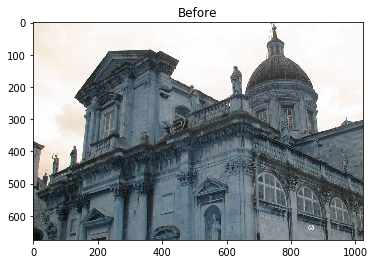

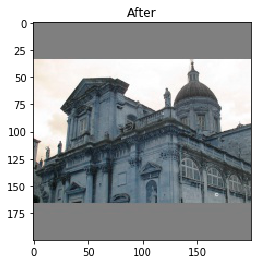

In [8]:
img_name = 'Baroque/0006.jpg'
orginal_image = cv2.imread(os.path.join(orginal_folder, img_name))
resized_image = cv2.imread(os.path.join(processed_folder, img_name))
plt.imshow(orginal_image)
plt.title('Before')
plt.show()
plt.imshow(resized_image)
plt.title('After')
plt.show()